# **2 Input XOR**

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step - accuracy: 1.0000 - loss: 0.0570
Model Accuracy: 100.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step

Predictions:
Input: [0 0] -> Predicted Output: -0.01
Input: [0 1] -> Predicted Output: 0.88
Input: [1 0] -> Predicted Output: 0.91
Input: [1 1] -> Predicted Output: -0.02


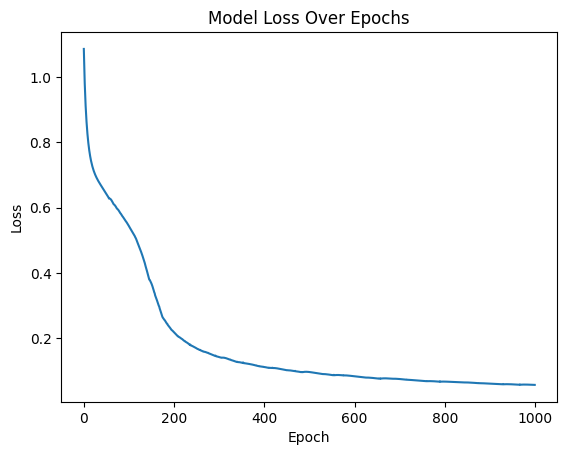

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Step 1: Define XOR input and output
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # XOR inputs
y = np.array([[0], [1], [1], [0]])              # XOR outputs

# Step 2: Create an MLP model with one hidden layer (2 neurons)
model = Sequential()
# Hidden layer with 2 neurons and Xavier/Glorot uniform weight initialization
model.add(Dense(2, input_dim=2, activation='relu', kernel_initializer='glorot_uniform'))
# Output layer with 1 neuron, 'sigmoid' activation replaced with 'softsign'
model.add(Dense(1, activation='softsign'))

# Step 3: Compile the model (use binary_crossentropy loss and Adam optimizer with a lower learning rate)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)  # Adjust learning rate
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Step 4: Train the model on XOR data
history = model.fit(X, y, epochs=1000, verbose=0)

# Step 5: Evaluate the model on XOR inputs
loss, accuracy = model.evaluate(X, y)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Step 6: Test the model by making predictions on XOR inputs
predictions = model.predict(X)
print("\nPredictions:")
for i in range(len(X)):
    print(f"Input: {X[i]} -> Predicted Output: {predictions[i][0]:.2f}")

# Step 7: Plot the loss over epochs
plt.plot(history.history['loss'])
plt.title('Model Loss Over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()


# **2 Input XOR with Sigmoida**

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid Activation Function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of Sigmoid
def sigmoid_derivative(x):
    return x * (1 - x)

# EX-OR Dataset
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
outputs = np.array([[0], [1], [1], [0]])

# Set random seed for reproducibility
np.random.seed(42)

# Initialize weights for input to hidden layer (2x2) and hidden to output layer (2x1)
input_layer_neurons = inputs.shape[1]   # Number of input neurons (2 for EX-OR)
hidden_layer_neurons = 2                # Number of neurons in hidden layer
output_neurons = 1                      # Output layer neuron (1 for binary classification)

# Randomly initialize weights using a normal distribution
weights_input_hidden = np.random.randn(input_layer_neurons, hidden_layer_neurons)
weights_hidden_output = np.random.randn(hidden_layer_neurons, output_neurons)

# Learning rate
learning_rate = 0.1

# Number of iterations for training
epochs = 10000

# To store the error at each epoch
errors = []

# Training process
for epoch in range(epochs):
    # Forward Propagation
    hidden_layer_input = np.dot(inputs, weights_input_hidden)
    hidden_layer_output = sigmoid(hidden_layer_input)

    final_input = np.dot(hidden_layer_output, weights_hidden_output)
    predicted_output = sigmoid(final_input)

    # Compute Error (Binary Cross Entropy Loss)
    error = outputs - predicted_output
    errors.append(np.mean(np.abs(error)))

    # Backpropagation
    d_predicted_output = error * sigmoid_derivative(predicted_output)

    error_hidden_layer = d_predicted_output.dot(weights_hidden_output.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

    # Updating weights
    weights_hidden_output += hidden_layer_output.T.dot(d_predicted_output) * learning_rate
    weights_input_hidden += inputs.T.dot(d_hidden_layer) * learning_rate

    # Print error every 1000 epochs
    if epoch % 1000 == 0:
        print(f'Epoch {epoch}, Error: {np.mean(np.abs(error))}')

# Testing the network
print("\nFinal weights after training:")
print("Weights between Input and Hidden Layer: \n", weights_input_hidden)
print("Weights between Hidden and Output Layer: \n", weights_hidden_output)

#


Epoch 0, Error: 0.5001114716672619
Epoch 1000, Error: 0.4993517832418255
Epoch 2000, Error: 0.4959919850287964
Epoch 3000, Error: 0.4727488494263793
Epoch 4000, Error: 0.4314078058098874
Epoch 5000, Error: 0.40854704223079935
Epoch 6000, Error: 0.39724697869087083
Epoch 7000, Error: 0.39075784516823764
Epoch 8000, Error: 0.3865475302627735
Epoch 9000, Error: 0.3835779121475485

Final weights after training:
Weights between Input and Hidden Layer: 
 [[ 3.4641557  -0.84939422]
 [ 5.71544549  5.29117795]]
Weights between Hidden and Output Layer: 
 [[ 3.96903367]
 [-4.44539356]]



Predicted Output after training:
[[ 0.44073491]
 [ 0.38529842]
 [ 0.92531265]
 [ 0.39531432]]


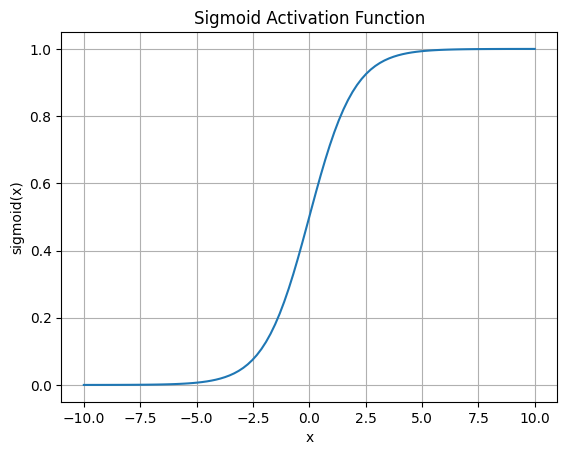

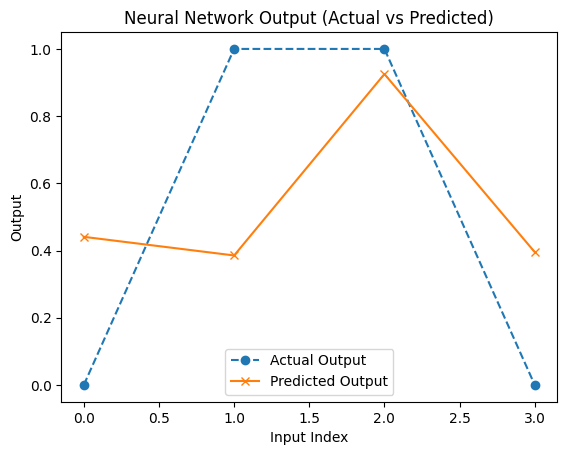

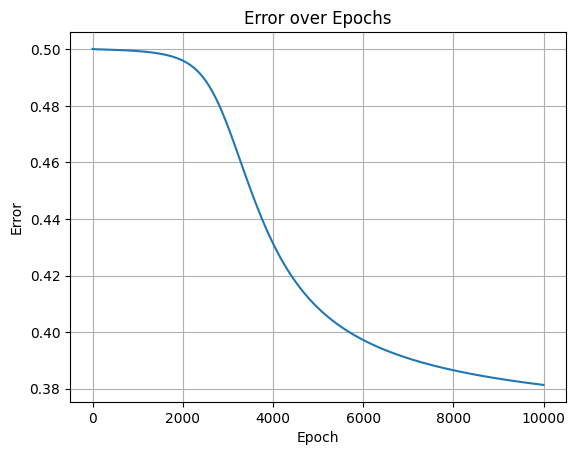

In [5]:
# Test the trained network
print("\nPredicted Output after training:")
print(predicted_output)

# Plot the sigmoid activation function
x = np.linspace(-10, 10, 100)
y = sigmoid(x)

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.title('Sigmoid Activation Function')
plt.grid(True)
plt.show()

# Plot the actual vs predicted output
plt.plot([0, 1, 2, 3], outputs, label='Actual Output', marker='o', linestyle='--')
plt.plot([0, 1, 2, 3], predicted_output, label='Predicted Output', marker='x', linestyle='-')
plt.xlabel('Input Index')
plt.ylabel('Output')
plt.title('Neural Network Output (Actual vs Predicted)')
plt.legend()
plt.show()

# Plot the error over epochs
plt.plot(errors)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Error over Epochs')
plt.grid(True)
plt.show()


# **3 input XOR using MLP**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.7500 - loss: 0.5761

3-Input XOR Model Accuracy: 75.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step

3-Input XOR Predictions:
Input: [0 0 0] -> Predicted Output: 0.38
Input: [0 0 1] -> Predicted Output: 0.56
Input: [0 1 0] -> Predicted Output: 0.45
Input: [0 1 1] -> Predicted Output: 0.37
Input: [1 0 0] -> Predicted Output: 0.62
Input: [1 0 1] -> Predicted Output: 0.56
Input: [1 1 0] -> Predicted Output: 0.43
Input: [1 1 1] -> Predicted Output: 0.65


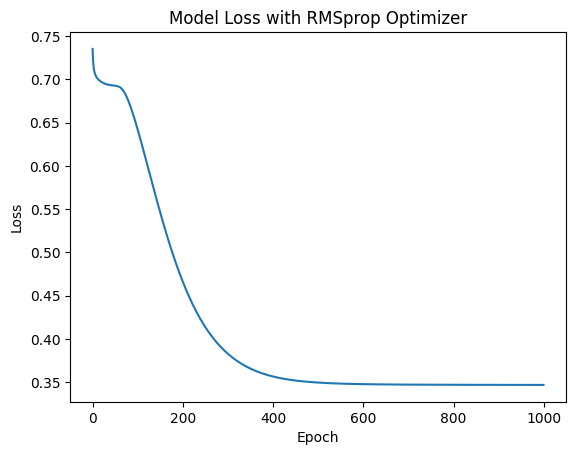

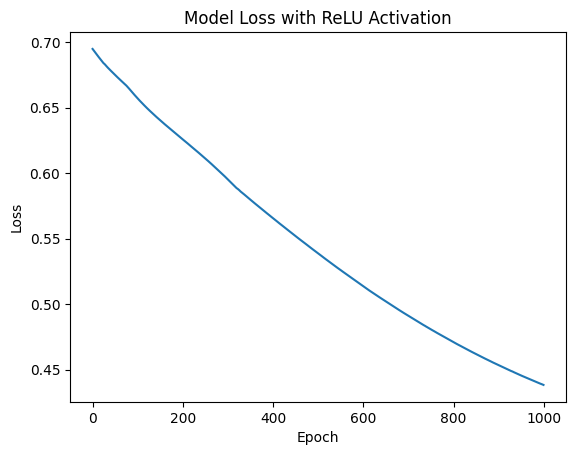

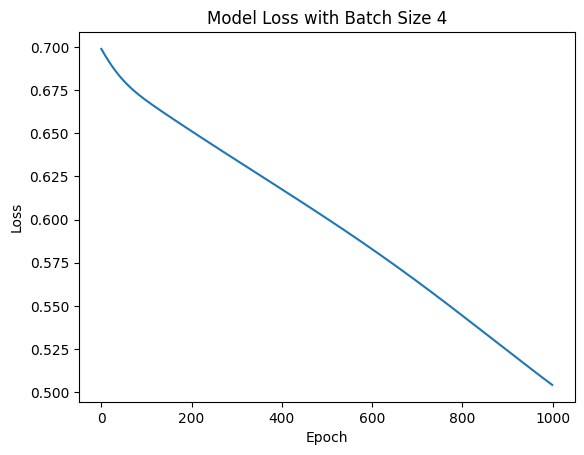

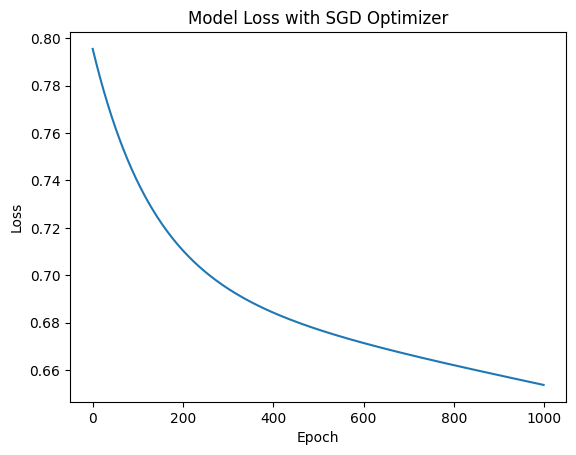

In [7]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Define 3-input XOR dataset
X_3input = np.array([[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1],
                     [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]])
y_3input = np.array([[0], [1], [1], [0], [1], [0], [0], [1]])

# Function to create an MLP model
def create_model(input_dim, hidden_neurons, activation='tanh', optimizer='adam'):
    model = Sequential()
    model.add(Dense(hidden_neurons, input_dim=input_dim, activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Step 1: Train 3-input XOR model
model_3input = create_model(3, 3)
history_3input = model_3input.fit(X_3input, y_3input, epochs=1000, verbose=0)
loss_3input, accuracy_3input = model_3input.evaluate(X_3input, y_3input)
print(f"\n3-Input XOR Model Accuracy: {accuracy_3input * 100:.2f}%")

# Predictions for 3-input XOR
predictions_3input = model_3input.predict(X_3input)
print("\n3-Input XOR Predictions:")
for i in range(len(X_3input)):
    print(f"Input: {X_3input[i]} -> Predicted Output: {predictions_3input[i][0]:.2f}")

# Step 2: Experiment with different optimizer (RMSprop) and learning rate
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # XOR for 2-input
y = np.array([[0], [1], [1], [0]])

model_rmsprop = create_model(2, 2, optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.01))
history_rmsprop = model_rmsprop.fit(X, y, epochs=1000, verbose=0)

# Plot loss with RMSprop optimizer
plt.plot(history_rmsprop.history['loss'])
plt.title('Model Loss with RMSprop Optimizer')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

# Step 3: Experiment with different activation function (ReLU) and more neurons
model_relu = create_model(2, 4, activation='relu')
history_relu = model_relu.fit(X, y, epochs=1000, verbose=0)

# Plot loss with ReLU activation
plt.plot(history_relu.history['loss'])
plt.title('Model Loss with ReLU Activation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

# Step 4: Experiment with different batch sizes (batch size 4)
model_batch_4 = create_model(2, 2)
history_batch_4 = model_batch_4.fit(X, y, epochs=1000, batch_size=4, verbose=0)

# Plot loss with batch size 4
plt.plot(history_batch_4.history['loss'])
plt.title('Model Loss with Batch Size 4')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

# Step 5: Experiment with a different optimizer (SGD)
model_sgd = create_model(2, 2, optimizer='sgd')
history_sgd = model_sgd.fit(X, y, epochs=1000, verbose=0)

# Plot loss with SGD optimizer
plt.plot(history_sgd.history['loss'])
plt.title('Model Loss with SGD Optimizer')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()
